# Testing 1GnB simulation

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Simulate Bernoulli trials: generate consumption requests vector

In [2]:
p_cons = 0.225
t_end = 10000

cons_requests = (np.random.rand(t_end) < p_cons)

print('%.3f'%p_cons)
p_cons_estimate = sum(cons_requests)/len(cons_requests)
print('%.3f (%.3f)'%(p_cons_estimate, np.sqrt(p_cons_estimate*(1-p_cons_estimate)/len(cons_requests)) ))

0.225
0.226 (0.004)


---
---
## Testing `single_run_1GnB()` - time evolution

In [47]:
n = 2

# GEN
p_gen = 1
F_new = 0.8
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 0.3
purif_protocol = main.DEJMPS
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end = 50
randomseed = 2

In [48]:
imp.reload(main)

Fcons_avg, Fcons_stderr, A_avg, A_stderr, buffered_fidelity, cons_requests, purif_events = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                                               purif_protocol, pur_after_swap, Gamma,
                                                                               p_cons, t_end, randomseed)

print('Average consumed fidelity: %.3f (%.3f)'%(Fcons_avg, Fcons_stderr))
print('Average availability: %.3f (%.3f)'%(A_avg, A_stderr))

Average consumed fidelity: 0.649 (0.009)
Average availability: 0.889 (0.105)


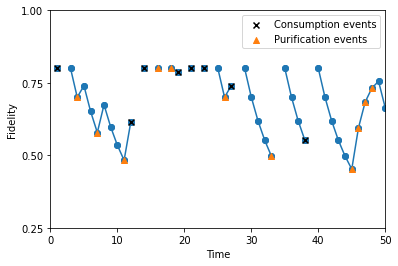

In [49]:
imp.reload(main)

main.plot_run_1GnB(buffered_fidelity, cons_requests, purif_events, n, p_gen, rho_new, q_purif, purif_protocol,
                       pur_after_swap, Gamma, p_cons, t_end, randomseed)

---
---
## Testing `single_run_1GnB()` - availability and consumed fidelity

In [63]:
n = 2

# GEN
p_gen = 1
F_new = 0.8
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 0.3
purif_protocol = main.DEJMPS
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end_vec = [int(10**i) for i in np.linspace(1,5,50)]
randomseed = 2

In [73]:
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []

for t_end in tqdmn(t_end_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                                               purif_protocol, pur_after_swap, Gamma,
                                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

  0%|          | 0/50 [00:00<?, ?it/s]

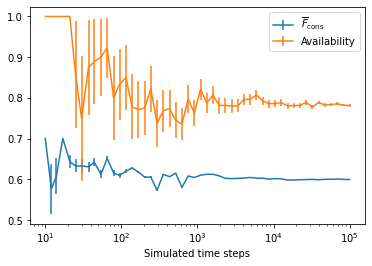

In [74]:
#------------------------------------
# Plot
#------------------------------------
fig, ax = plt.subplots()
plt.errorbar(t_end_vec, Fcons_avg_vec, yerr=Fcons_stderr_vec, label=r'$\overline{F}_\mathrm{cons}$')
plt.errorbar(t_end_vec, A_avg_vec, yerr=A_stderr_vec, label=r'Availability')

plt.xscale('log')

plt.xlabel('Simulated time steps')

plt.legend()

---
### CONCLUSIONS:
 1. x
---